In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Latest Covid-19 India Status.csv")
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10747,0,10618,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2339078,7,2324338,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,66891,0,66595,296,0.0,99.56,0.44,658019
3,Assam,746100,0,738065,8035,0.0,98.92,1.08,290492
4,Bihar,851404,1,839100,12303,0.0,98.55,1.45,40100376


In [4]:
df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.241145e+06,56.527778,1.226346e+06,14742.388889,0.002222,98.893333,1.103889,3.971861e+07
std,1.834031e+06,215.847762,1.808252e+06,27170.089767,0.007601,0.498764,0.498479,5.050913e+07
min,1.074700e+04,0.000000,1.061800e+04,4.000000,0.000000,97.540000,0.030000,6.600100e+04
25%,1.058650e+05,0.000000,1.048640e+05,1120.750000,0.000000,98.672500,0.842500,1.695473e+06
50%,6.127720e+05,7.500000,6.063570e+05,6542.000000,0.000000,98.925000,1.070000,2.410088e+07
75%,1.320822e+06,27.500000,1.311256e+06,14292.750000,0.000000,99.150000,1.327500,6.979986e+07
max,8.136945e+06,1300.000000,7.988392e+06,148419.000000,0.040000,99.970000,2.460000,2.315026e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [6]:
df['State/UTs'].unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telengana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [7]:
df['State/UTs'].nunique()

36

In [8]:
df['Deaths'].unique()

array([   129,  14733,    296,   8035,  12303,   1181,  14146,      4,
        26522,   4013,  11043,  10714,   4213,   4785,   5331,  40308,
        71570,    231,     52,  10777, 148419,   2149,   1624,    726,
          782,   9205,   1975,  19289,   9653,    499,  38049,   4111,
          940,  23634,   7753,  21532], dtype=int64)

In [9]:
df['Deaths'].nunique()

36

In [10]:
df['State/UTs'].value_counts()

Andaman and Nicobar                         1
Andhra Pradesh                              1
Maharashtra                                 1
Manipur                                     1
Meghalaya                                   1
Mizoram                                     1
Nagaland                                    1
Odisha                                      1
Puducherry                                  1
Punjab                                      1
Rajasthan                                   1
Sikkim                                      1
Tamil Nadu                                  1
Telengana                                   1
Tripura                                     1
Uttar Pradesh                               1
Uttarakhand                                 1
Madhya Pradesh                              1
Lakshadweep                                 1
Ladakh                                      1
Delhi                                       1
Arunachal Pradesh                 

In [11]:
df.isnull().sum()


State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64

In [12]:
df.notnull().sum()

State/UTs          36
Total Cases        36
Active             36
Discharged         36
Deaths             36
Active Ratio       36
Discharge Ratio    36
Death Ratio        36
Population         36
dtype: int64

In [16]:
df.rename(columns={'State/UTs':'states_and_UTS'},inplace=True)
df.head()

,state_and_UTS,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10747,0,10618,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2339078,7,2324338,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,66891,0,66595,296,0.0,99.56,0.44,658019
3,Assam,746100,0,738065,8035,0.0,98.92,1.08,290492
4,Bihar,851404,1,839100,12303,0.0,98.55,1.45,40100376


In [17]:
df['Total Cases'].mean()

1241145.361111111

In [18]:
df['Total Cases'].median()

612772.0

In [19]:
df['Total Cases'].std()

1834030.7820012518

In [20]:
df[(df['Total Cases']>2)&(df['Discharge Ratio']>98.92)]
df.head()

,state_and_UTS,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10747,0,10618,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2339078,7,2324338,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,66891,0,66595,296,0.0,99.56,0.44,658019
3,Assam,746100,0,738065,8035,0.0,98.92,1.08,290492
4,Bihar,851404,1,839100,12303,0.0,98.55,1.45,40100376


In [22]:
df.groupby('Total Cases').mean()

C:\Users\saite\AppData\Local\Temp\ipykernel_17092\1930104063.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Total Cases').mean()


,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
Total Cases,,,,,,,
10747,0.0,10618.0,129.0,0.00,98.80,1.20,100896618.0
11415,0.0,11363.0,52.0,0.00,99.54,0.46,11700099.0
11591,0.0,11587.0,4.0,0.00,99.97,0.03,231502578.0
29417,1.0,29185.0,231.0,0.00,99.21,0.79,4184959.0
35986,0.0,35204.0,782.0,0.00,97.83,2.17,38157311.0
44321,2.0,43820.0,499.0,0.00,98.87,1.13,83697770.0
66891,0.0,66595.0,296.0,0.00,99.56,0.44,658019.0
96786,1.0,95161.0,1624.0,0.00,98.32,1.68,79502477.0
99358,3.0,98174.0,1181.0,0.00,98.81,1.19,30501026.0


In [23]:
df.groupby('Total Cases').min()

,state_and_UTS,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
Total Cases,,,,,,,,
10747,Andaman and Nicobar,0,10618,129,0.00,98.80,1.20,100896618
11415,Lakshadweep,0,11363,52,0.00,99.54,0.46,11700099
11591,Dadra and Nagar Haveli and Daman and Diu,0,11587,4,0.00,99.97,0.03,231502578
29417,Ladakh,1,29185,231,0.00,99.21,0.79,4184959
35986,Nagaland,0,35204,782,0.00,97.83,2.17,38157311
44321,Sikkim,2,43820,499,0.00,98.87,1.13,83697770
66891,Arunachal Pradesh,0,66595,296,0.00,99.56,0.44,658019
96786,Meghalaya,1,95161,1624,0.00,98.32,1.68,79502477
99358,Chandigarh,3,98174,1181,0.00,98.81,1.19,30501026


In [24]:
df.groupby('Total Cases').max()

,state_and_UTS,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
Total Cases,,,,,,,,
10747,Andaman and Nicobar,0,10618,129,0.00,98.80,1.20,100896618
11415,Lakshadweep,0,11363,52,0.00,99.54,0.46,11700099
11591,Dadra and Nagar Haveli and Daman and Diu,0,11587,4,0.00,99.97,0.03,231502578
29417,Ladakh,1,29185,231,0.00,99.21,0.79,4184959
35986,Nagaland,0,35204,782,0.00,97.83,2.17,38157311
44321,Sikkim,2,43820,499,0.00,98.87,1.13,83697770
66891,Arunachal Pradesh,0,66595,296,0.00,99.56,0.44,658019
96786,Meghalaya,1,95161,1624,0.00,98.32,1.68,79502477
99358,Chandigarh,3,98174,1181,0.00,98.81,1.19,30501026


In [25]:
df[df['state_and_UTS']=='Andhra Pradesh']

,state_and_UTS,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
1,Andhra Pradesh,2339078,7,2324338,14733,0.0,99.37,0.63,128500364


In [29]:
df[df['state_and_UTS']=='Telengana']

,state_and_UTS,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
31,Telengana,841453,27,837315,4111,0.0,99.51,0.49,69599762


In [30]:
df[df['Active']==0]

,state_and_UTS,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10747,0,10618,129,0.0,98.80,1.20,100896618
2,Arunachal Pradesh,66891,0,66595,296,0.0,99.56,0.44,658019
3,Assam,746100,0,738065,8035,0.0,98.92,1.08,290492
7,Dadra and Nagar Haveli and Daman and Diu,11591,0,11587,4,0.0,99.97,0.03,231502578
14,Jharkhand,442574,0,437243,5331,0.0,98.80,1.20,124904071
18,Lakshadweep,11415,0,11363,52,0.0,99.54,0.46,11700099
21,Manipur,139924,0,137775,2149,0.0,98.46,1.54,47099270
23,Mizoram,238964,0,238238,726,0.0,99.70,0.30,1308967
24,Nagaland,35986,0,35204,782,0.0,97.83,2.17,38157311
32,Tripura,108034,0,107094,940,0.0,99.13,0.87,1646050


In [31]:
df[(df['Active']==0)&(df['Deaths']>1000)]

,state_and_UTS,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
3,Assam,746100,0,738065,8035,0.0,98.92,1.08,290492
14,Jharkhand,442574,0,437243,5331,0.0,98.80,1.20,124904071
21,Manipur,139924,0,137775,2149,0.0,98.46,1.54,47099270


In [32]:
df[(df['Active']==0)&(df['Deaths']>100)]

,state_and_UTS,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10747,0,10618,129,0.0,98.80,1.20,100896618
2,Arunachal Pradesh,66891,0,66595,296,0.0,99.56,0.44,658019
3,Assam,746100,0,738065,8035,0.0,98.92,1.08,290492
14,Jharkhand,442574,0,437243,5331,0.0,98.80,1.20,124904071
21,Manipur,139924,0,137775,2149,0.0,98.46,1.54,47099270
23,Mizoram,238964,0,238238,726,0.0,99.70,0.30,1308967
24,Nagaland,35986,0,35204,782,0.0,97.83,2.17,38157311
32,Tripura,108034,0,107094,940,0.0,99.13,0.87,1646050


<Figure size 0x1000 with 0 Axes>

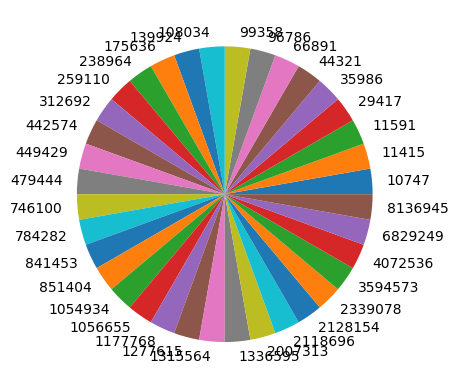

<Figure size 0x1000 with 0 Axes>

In [35]:
df.groupby('Total Cases').size().plot(kind='pie',subplots=True)
plt.figure(figsize=(0,10))

In [36]:
import seaborn as sb


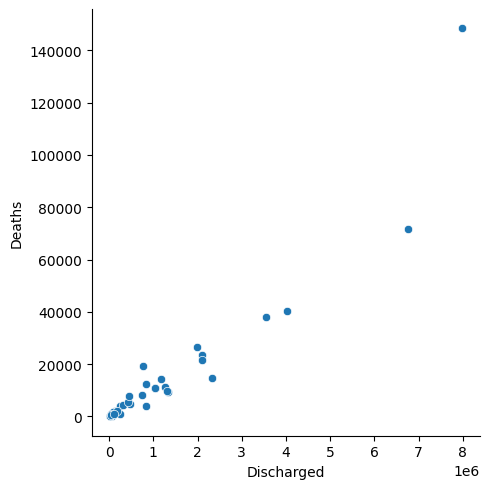

In [37]:
sb.relplot(x='Discharged',y='Deaths',data=df)